In [24]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [25]:
# 2. Load Dataset and Preview
df = pd.read_csv('SampleData_Apartments.csv')
df.head()

,id,buyOrRent,propertyType,price,zip,city,street,builtUpArea,surfaceLiving,surfaceGround,...,facing,amenities,locality,avgPrice,coveredParkingNb,uncoveredParkingNb,projectName,projectType,projectStatus,Unnamed: 39
0,649002,buy,A3,49700000.0,NaN,Mumbai,NaN,NaN,NaN,NaN,...,North-East facing,"Amphitheater, Volleyball Court, Gazebo, Spa, F...",Lower Parel,4857.904663,1.0,NaN,Lodha Park,NaN,NaN,NaN
1,649054,buy,A3,33500000.0,NaN,Mumbai,NaN,NaN,NaN,NaN,...,East facing,"Entrance Lobby, Board Games, Swimming Pool, Va...",Kandivali West,2431.27491,1.0,NaN,Siddha Seabrook,NaN,NaN,NaN
2,649187,buy,A3,30800000.0,NaN,Mumbai,NaN,NaN,NaN,NaN,...,West facing,"Amphitheater, Tennis Court, Sauna Bath, Spa, G...",Ghatkopar West,2289.133121,2.0,NaN,Kalpataru Aura,NaN,NaN,NaN
3,649003,buy,A3,49700000.0,NaN,Mumbai,NaN,NaN,NaN,NaN,...,North-East facing,"Amphitheater, Volleyball Court, Gazebo, Spa, F...",Lower Parel,4857.904663,1.0,NaN,Lodha Park,NaN,NaN,NaN
4,649055,buy,A3,33500000.0,NaN,Mumbai,NaN,NaN,NaN,NaN,...,East facing,"Entrance Lobby, Board Games, Swimming Pool, Va...",Kandivali West,2431.27491,1.0,NaN,Siddha Seabrook,NaN,NaN,NaN


In [26]:
# 3. EDA - Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   buyOrRent             10000 non-null  object 
 2   propertyType          10000 non-null  object 
 3   price                 9526 non-null   float64
 4   zip                   0 non-null      float64
 5   city                  10000 non-null  object 
 6   street                0 non-null      float64
 7   builtUpArea           27 non-null     float64
 8   surfaceLiving         8598 non-null   float64
 9   surfaceGround         11 non-null     float64
 10  roomNb                9505 non-null   float64
 11  bathNb                9503 non-null   float64
 12  buildYear             5672 non-null   float64
 13  balconyNb             9505 non-null   float64
 14  floor                 640 non-null    float64
 15  floorNb             

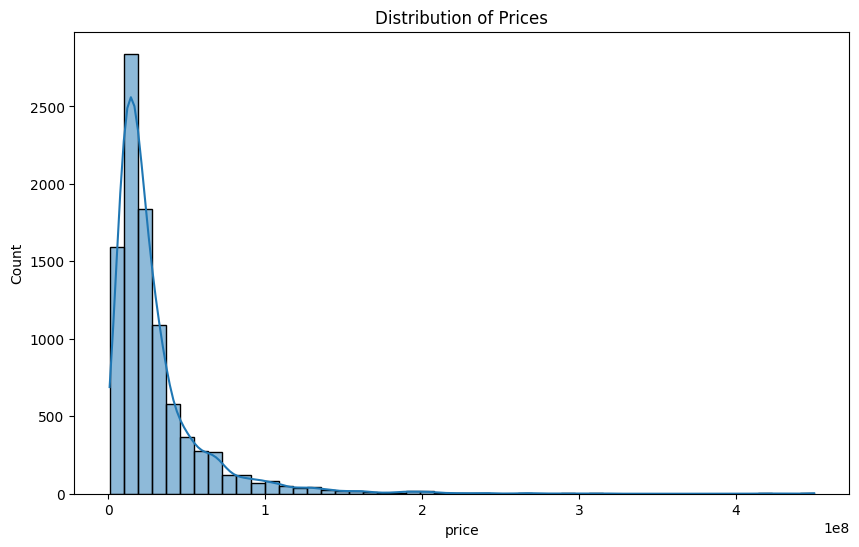

In [27]:
# 4. EDA - Visualizations
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.show()


In [28]:
# Drop columns with all null values
df = df.dropna(axis=1, how='all')
df.head()

,id,buyOrRent,propertyType,price,city,builtUpArea,surfaceLiving,surfaceGround,roomNb,bathNb,...,longitude,address,isWaterAvailable24X7,facing,amenities,locality,avgPrice,coveredParkingNb,uncoveredParkingNb,projectName
0,649002,buy,A3,49700000.0,Mumbai,NaN,NaN,NaN,2.0,2.0,...,72.82861,"Lodha Park, Century Mills, Lower Parel, Mumbai",1,North-East facing,"Amphitheater, Volleyball Court, Gazebo, Spa, F...",Lower Parel,4857.904663,1.0,NaN,Lodha Park
1,649054,buy,A3,33500000.0,Mumbai,NaN,NaN,NaN,3.0,1.0,...,72.83465,"Siddha Seabrook, Kandivali West, Mumbai",1,East facing,"Entrance Lobby, Board Games, Swimming Pool, Va...",Kandivali West,2431.27491,1.0,NaN,Siddha Seabrook
2,649187,buy,A3,30800000.0,Mumbai,NaN,NaN,NaN,3.0,1.0,...,72.91743,"Kalpataru Aura, Nityanand Nagar, Ghatkopar Wes...",1,West facing,"Amphitheater, Tennis Court, Sauna Bath, Spa, G...",Ghatkopar West,2289.133121,2.0,NaN,Kalpataru Aura
3,649003,buy,A3,49700000.0,Mumbai,NaN,NaN,NaN,2.0,2.0,...,72.82861,"Lodha Park, Century Mills, Lower Parel, Mumbai",1,North-East facing,"Amphitheater, Volleyball Court, Gazebo, Spa, F...",Lower Parel,4857.904663,1.0,NaN,Lodha Park
4,649055,buy,A3,33500000.0,Mumbai,NaN,NaN,NaN,3.0,1.0,...,72.83465,"Siddha Seabrook, Kandivali West, Mumbai",1,East facing,"Entrance Lobby, Board Games, Swimming Pool, Va...",Kandivali West,2431.27491,1.0,NaN,Siddha Seabrook


In [ ]:
# Percentage of null values in every column (descending order)
null_percent = df.isnull().mean() * 100
print(null_percent.sort_values(ascending=False))

floorType               99.91
surfaceGround           99.89
builtUpArea             99.73
liftFlag                93.69
floor                   93.60
terraces                93.56
uncoveredParkingNb      71.22
swimmingPool            47.59
buildYear               43.28
garden                  43.23
coveredParkingNb        33.35
projectName             26.67
facing                  18.74
parkingNb               16.09
surfaceLiving           14.02
floorNb                  5.45
locality                 5.22
furnishedType            5.05
bathNb                   4.97
balconyNb                4.95
roomNb                   4.95
price                    4.74
avgPrice                 3.36
address                  3.35
amenities                0.17
id                       0.00
buyOrRent                0.00
propertyType             0.00
city                     0.00
longitude                0.00
latitude                 0.00
url                      0.00
isWaterAvailable24X7     0.00
dtype: flo

In [30]:
# Drop columns with more than 20% null values
threshold = 20
df = df.loc[:, df.isnull().mean() * 100 <= threshold]
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   buyOrRent             10000 non-null  object 
 2   propertyType          10000 non-null  object 
 3   price                 9526 non-null   float64
 4   city                  10000 non-null  object 
 5   surfaceLiving         8598 non-null   float64
 6   roomNb                9505 non-null   float64
 7   bathNb                9503 non-null   float64
 8   balconyNb             9505 non-null   float64
 9   floorNb               9455 non-null   float64
 10  furnishedType         9495 non-null   object 
 11  parkingNb             8391 non-null   float64
 12  url                   10000 non-null  object 
 13  latitude              10000 non-null  float64
 14  longitude             10000 non-null  float64
 15  address             

In [31]:
# Drop specified columns
cols_to_drop = ['id', 'buyOrRent', 'propertyType', 'city', 'url', 'latitude', 'longitude', 'isWaterAvailable24X7', 'amenities', 'address', 'avgPrice']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df.head()

,price,surfaceLiving,roomNb,bathNb,balconyNb,floorNb,furnishedType,parkingNb,facing,locality
0,49700000.0,NaN,2.0,2.0,0.0,78.0,Unfurnished,1.0,North-East facing,Lower Parel
1,33500000.0,NaN,3.0,1.0,1.0,57.0,Unfurnished,1.0,East facing,Kandivali West
2,30800000.0,NaN,3.0,1.0,0.0,20.0,Unfurnished,2.0,West facing,Ghatkopar West
3,49700000.0,NaN,2.0,2.0,0.0,78.0,Unfurnished,1.0,North-East facing,Lower Parel
4,33500000.0,NaN,3.0,1.0,1.0,57.0,Unfurnished,1.0,East facing,Kandivali West


In [32]:
# Remove rows where price is null
df = df[df['price'].notnull()]
df.info()
df.describe(include=['float', 'object']).T

<class 'pandas.core.frame.DataFrame'>
Index: 9526 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9526 non-null   float64
 1   surfaceLiving  8489 non-null   float64
 2   roomNb         9505 non-null   float64
 3   bathNb         9503 non-null   float64
 4   balconyNb      9505 non-null   float64
 5   floorNb        9455 non-null   float64
 6   furnishedType  9495 non-null   object 
 7   parkingNb      8391 non-null   float64
 8   facing         8123 non-null   object 
 9   locality       9334 non-null   object 
dtypes: float64(7), object(3)
memory usage: 818.6+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,9526.0,NaN,NaN,NaN,30008634.873504,32591475.807085,850000.0,12300000.0,20000000.0,34500000.0,450000000.0
surfaceLiving,8489.0,NaN,NaN,NaN,831.046766,497.687379,150.0,511.0,700.0,981.0,6000.0
roomNb,9505.0,NaN,NaN,NaN,2.138453,0.935515,1.0,1.0,2.0,3.0,10.0
bathNb,9503.0,NaN,NaN,NaN,2.250132,0.836222,1.0,2.0,2.0,3.0,11.0
balconyNb,9505.0,NaN,NaN,NaN,0.776433,1.075825,0.0,0.0,0.0,1.0,11.0
floorNb,9455.0,NaN,NaN,NaN,23.733897,14.373602,2.0,14.0,22.0,32.0,99.0
furnishedType,9495,3,Unfurnished,4842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parkingNb,8391.0,NaN,NaN,NaN,1.397569,0.676148,1.0,1.0,1.0,2.0,8.0
facing,8123,8,East facing,3944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locality,9334,107,Powai,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Fill nulls: float64 with mean, object with mode
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].median(), inplace=True)
    elif df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
df.info()
df.describe(include=['float', 'object']).T

<class 'pandas.core.frame.DataFrame'>
Index: 9526 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9526 non-null   float64
 1   surfaceLiving  9526 non-null   float64
 2   roomNb         9526 non-null   float64
 3   bathNb         9526 non-null   float64
 4   balconyNb      9526 non-null   float64
 5   floorNb        9526 non-null   float64
 6   furnishedType  9526 non-null   object 
 7   parkingNb      9526 non-null   float64
 8   facing         9526 non-null   object 
 9   locality       9526 non-null   object 
dtypes: float64(7), object(3)
memory usage: 818.6+ KB


C:\Users\immoit\AppData\Local\Temp\ipykernel_16888\1770887602.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\immoit\AppData\Local\Temp\ipykernel_16888\1770887602.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,9526.0,NaN,NaN,NaN,30008634.873504,32591475.807085,850000.0,12300000.0,20000000.0,34500000.0,450000000.0
surfaceLiving,9526.0,NaN,NaN,NaN,816.78102,471.584794,150.0,550.0,700.0,929.0,6000.0
roomNb,9526.0,NaN,NaN,NaN,2.138148,0.934506,1.0,1.0,2.0,3.0,10.0
bathNb,9526.0,NaN,NaN,NaN,2.249528,0.835302,1.0,2.0,2.0,3.0,11.0
balconyNb,9526.0,NaN,NaN,NaN,0.774722,1.075255,0.0,0.0,0.0,1.0,11.0
floorNb,9526.0,NaN,NaN,NaN,23.720974,14.320707,2.0,14.0,22.0,32.0,99.0
furnishedType,9526,3,Unfurnished,4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parkingNb,9526.0,NaN,NaN,NaN,1.350199,0.647526,1.0,1.0,1.0,2.0,8.0
facing,9526,8,East facing,5347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locality,9526,107,Powai,901,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Set target as price and add price per square column
target = df['price']
df['price_per_square'] = df['price'] / df['surfaceLiving']
df[['price', 'surfaceLiving', 'price_per_square']].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9526 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             9526 non-null   float64
 1   surfaceLiving     9526 non-null   float64
 2   roomNb            9526 non-null   float64
 3   bathNb            9526 non-null   float64
 4   balconyNb         9526 non-null   float64
 5   floorNb           9526 non-null   float64
 6   furnishedType     9526 non-null   object 
 7   parkingNb         9526 non-null   float64
 8   facing            9526 non-null   object 
 9   locality          9526 non-null   object 
 10  price_per_square  9526 non-null   float64
dtypes: float64(8), object(3)
memory usage: 893.1+ KB


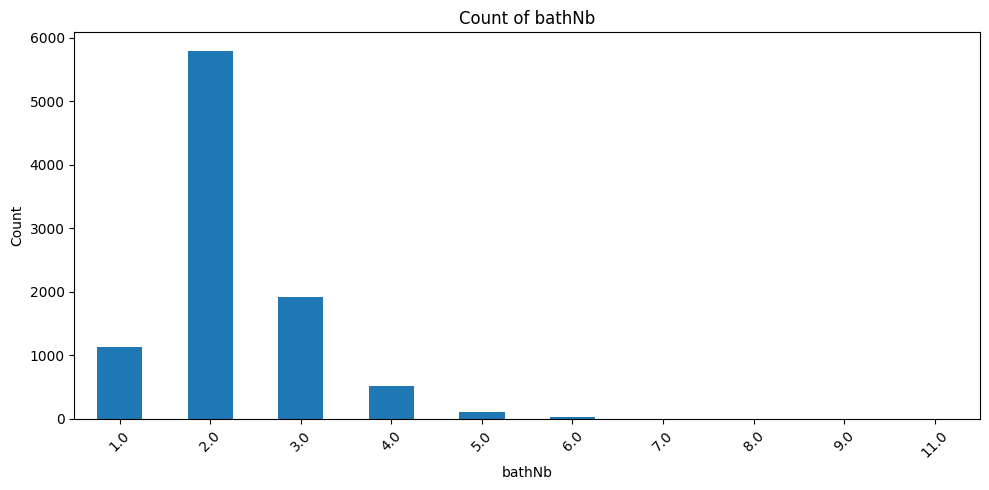

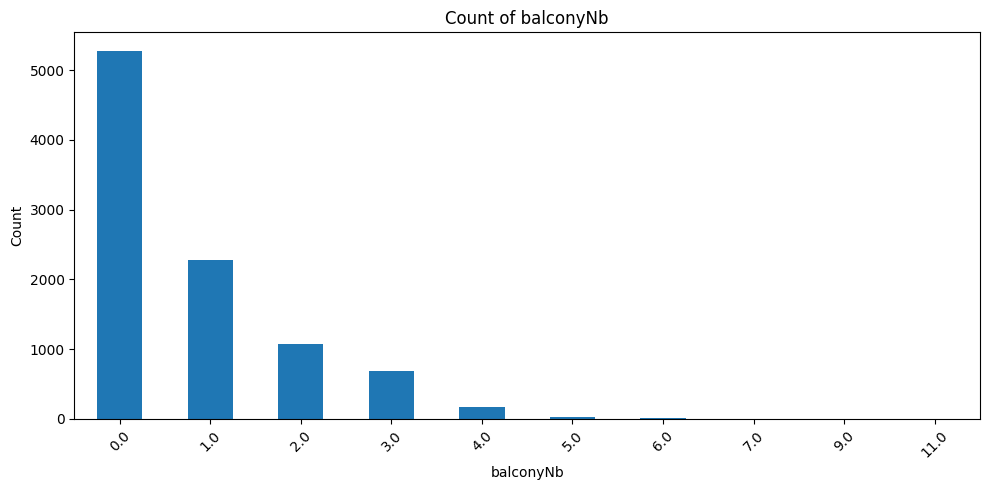

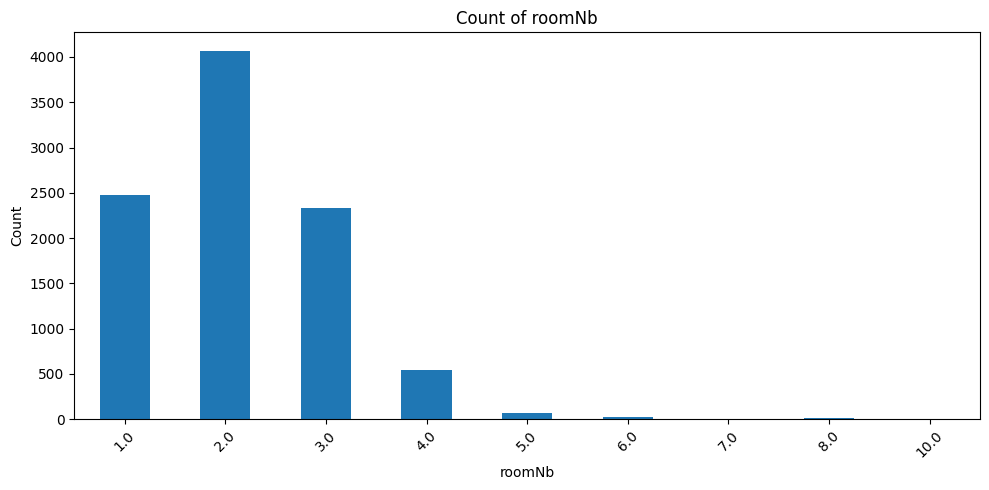

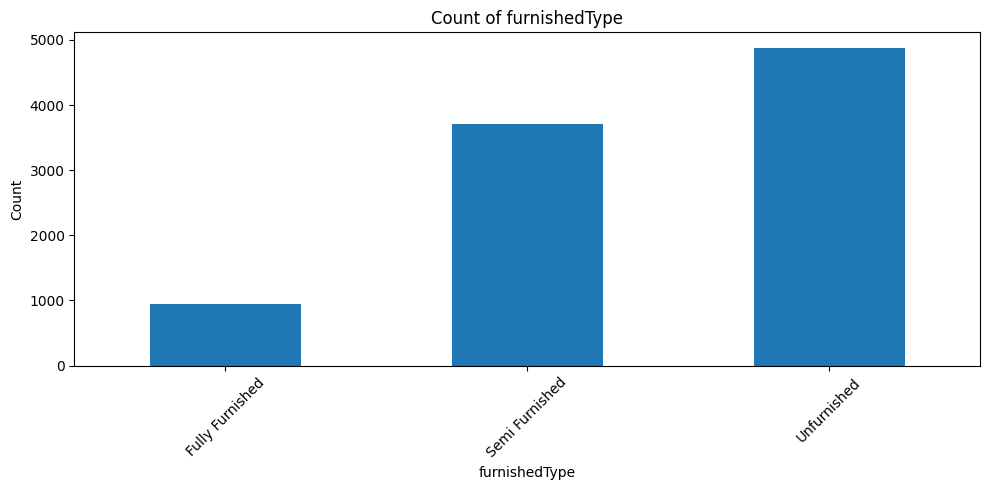

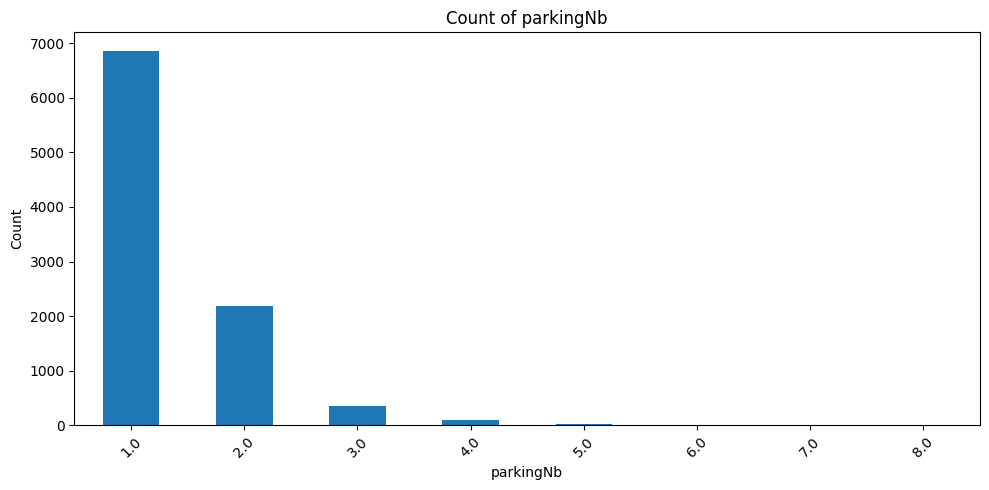

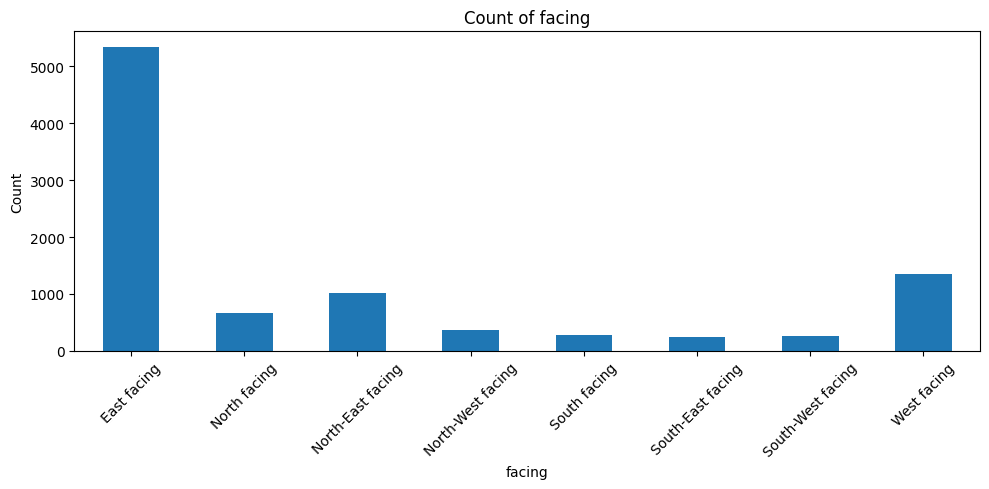

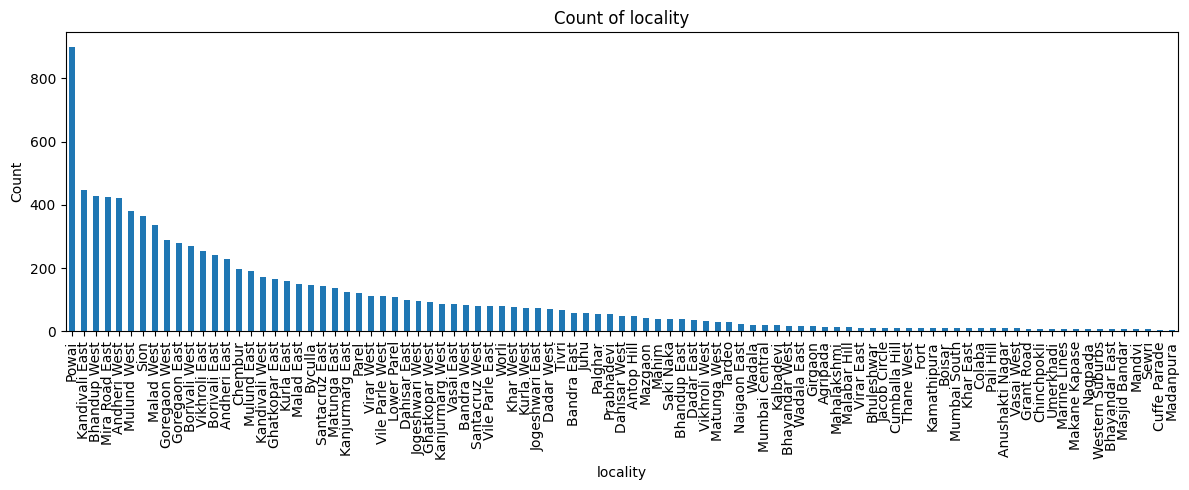

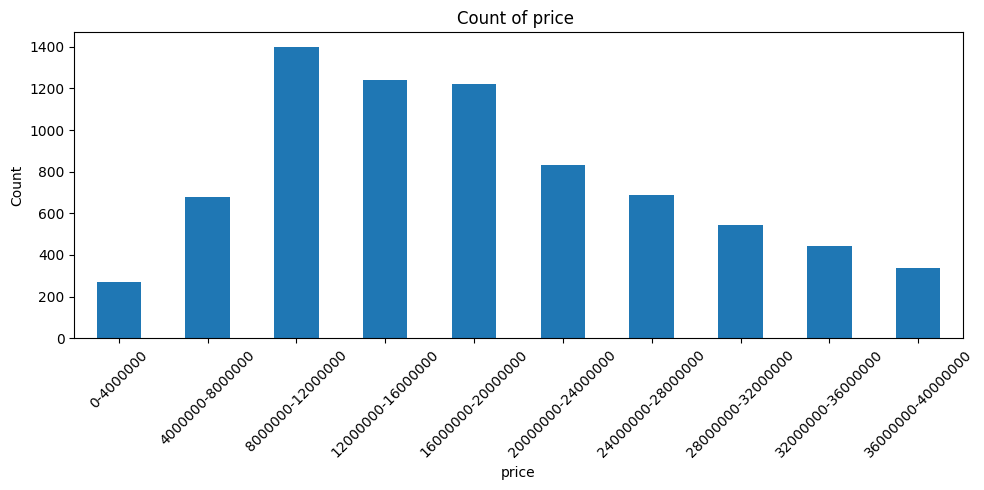

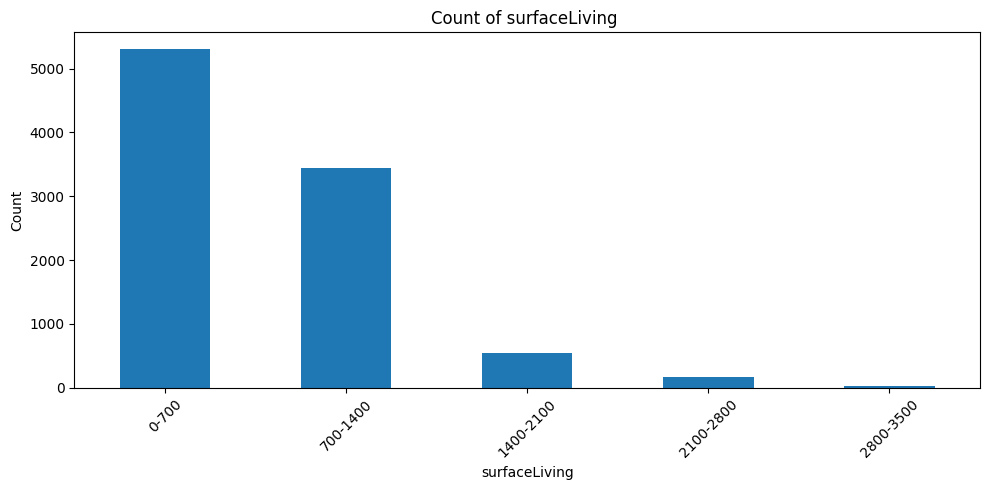

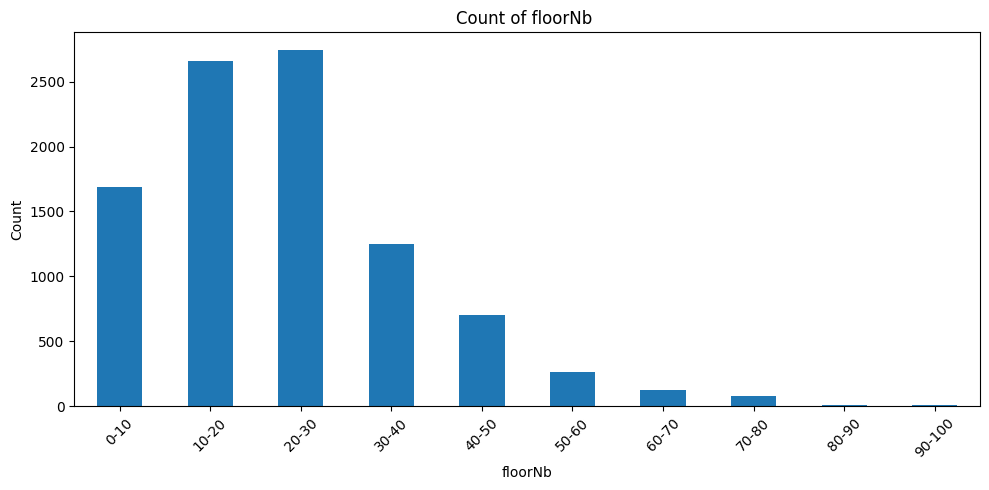

In [ ]:
# Categorical columns (filter localities with small counts)
cat_cols = ['bathNb', 'balconyNb', 'roomNb', 'furnishedType', 'parkingNb', 'facing']
for col in cat_cols:
    plt.figure(figsize=(10,5))
    value_counts = df[col].value_counts().sort_index()
    value_counts.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Locality: filter out small counts (e.g., less than 5)
locality_counts = df['locality'].value_counts()
filtered_localities = locality_counts[locality_counts >= 5]
plt.figure(figsize=(12,5))
filtered_localities.plot(kind='bar')
plt.xlabel('locality')
plt.ylabel('Count')
plt.title('Count of locality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# price: custom intervals and labels (e.g., 0-4cr, 4-8cr, ...)
price_bins = [0, 4000000, 8000000, 12000000, 16000000, 20000000, 24000000, 28000000, 32000000, 36000000, 40000000]
price_labels = [f'{i}-{i+4000000}' for i in range(0, 40000000, 4000000)]
binned_price = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)
price_counts = binned_price.value_counts().sort_index()
plt.figure(figsize=(10,5))
price_counts.plot(kind='bar')
plt.xlabel('price')
plt.ylabel('Count')
plt.title('Count of price ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# surfaceLiving: custom intervals and labels (e.g., 0-700, 700-1400, ...)
surface_bins = [0, 700, 1400, 2100, 2800, 3500]
surface_labels = ['0-700', '700-1400', '1400-2100', '2100-2800', '2800-3500']
binned_surface = pd.cut(df['surfaceLiving'], bins=surface_bins, labels=surface_labels, include_lowest=True)
surface_counts = binned_surface.value_counts().sort_index()
plt.figure(figsize=(10,5))
surface_counts.plot(kind='bar')
plt.xlabel('surfaceLiving')
plt.ylabel('Count')
plt.title('Count of surfaceLiving ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# floorNb: custom bins 0-10, 10-20, ..., 90-100, label by interval
floor_bins = np.arange(0, 110, 10)
floor_labels = [f'{i}-{i+10}' for i in range(0, 100, 10)]
binned_floor = pd.cut(df['floorNb'], bins=floor_bins, labels=floor_labels, include_lowest=True)
floor_counts = binned_floor.value_counts().sort_index()
plt.figure(figsize=(10,5))
floor_counts.plot(kind='bar')
plt.xlabel('floorNb')
plt.ylabel('Count')
plt.title('Count of floorNb ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

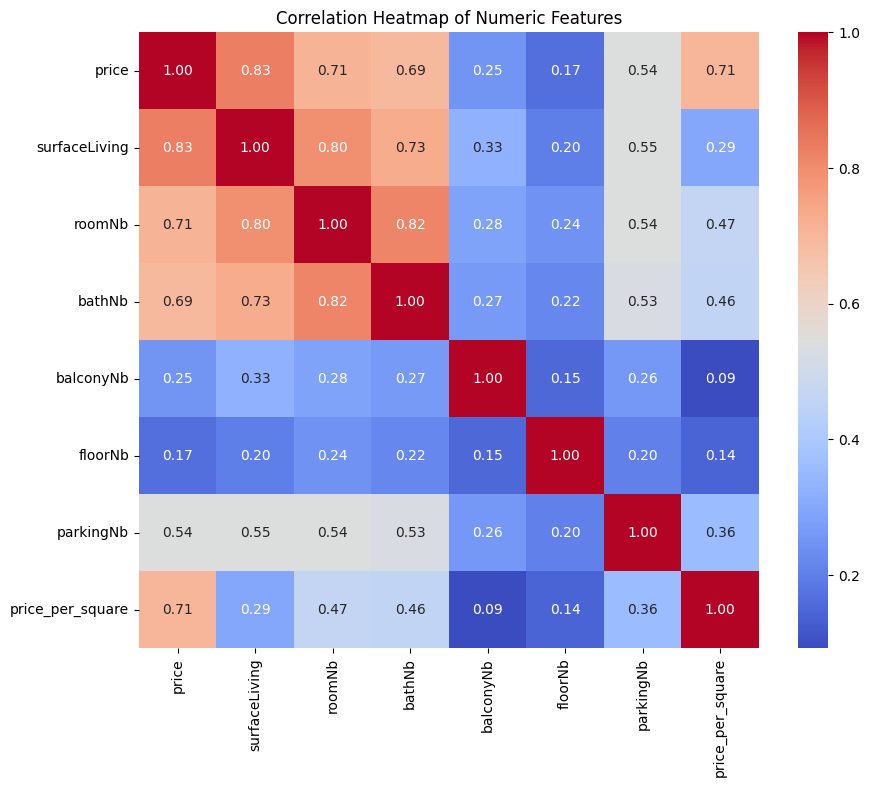

In [36]:
# Heatmap of correlations between numeric columns (excluding dtype column)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [37]:


# Select features and target
features = ['surfaceLiving', 'roomNb', 'bathNb', 'balconyNb', 'floorNb', 'parkingNb', 'furnishedType', 'facing', 'locality']
target = 'price'

X = df[features]
y = df[target]

# Identify categorical and numeric columns
numeric_features = ['surfaceLiving', 'roomNb', 'bathNb', 'balconyNb', 'floorNb', 'parkingNb']
categorical_features = ['furnishedType', 'facing', 'locality']

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
 )
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\immoit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.063e+16, tolerance: 8.196e+14
  model = cd_fast.sparse_enet_coordinate_descent(


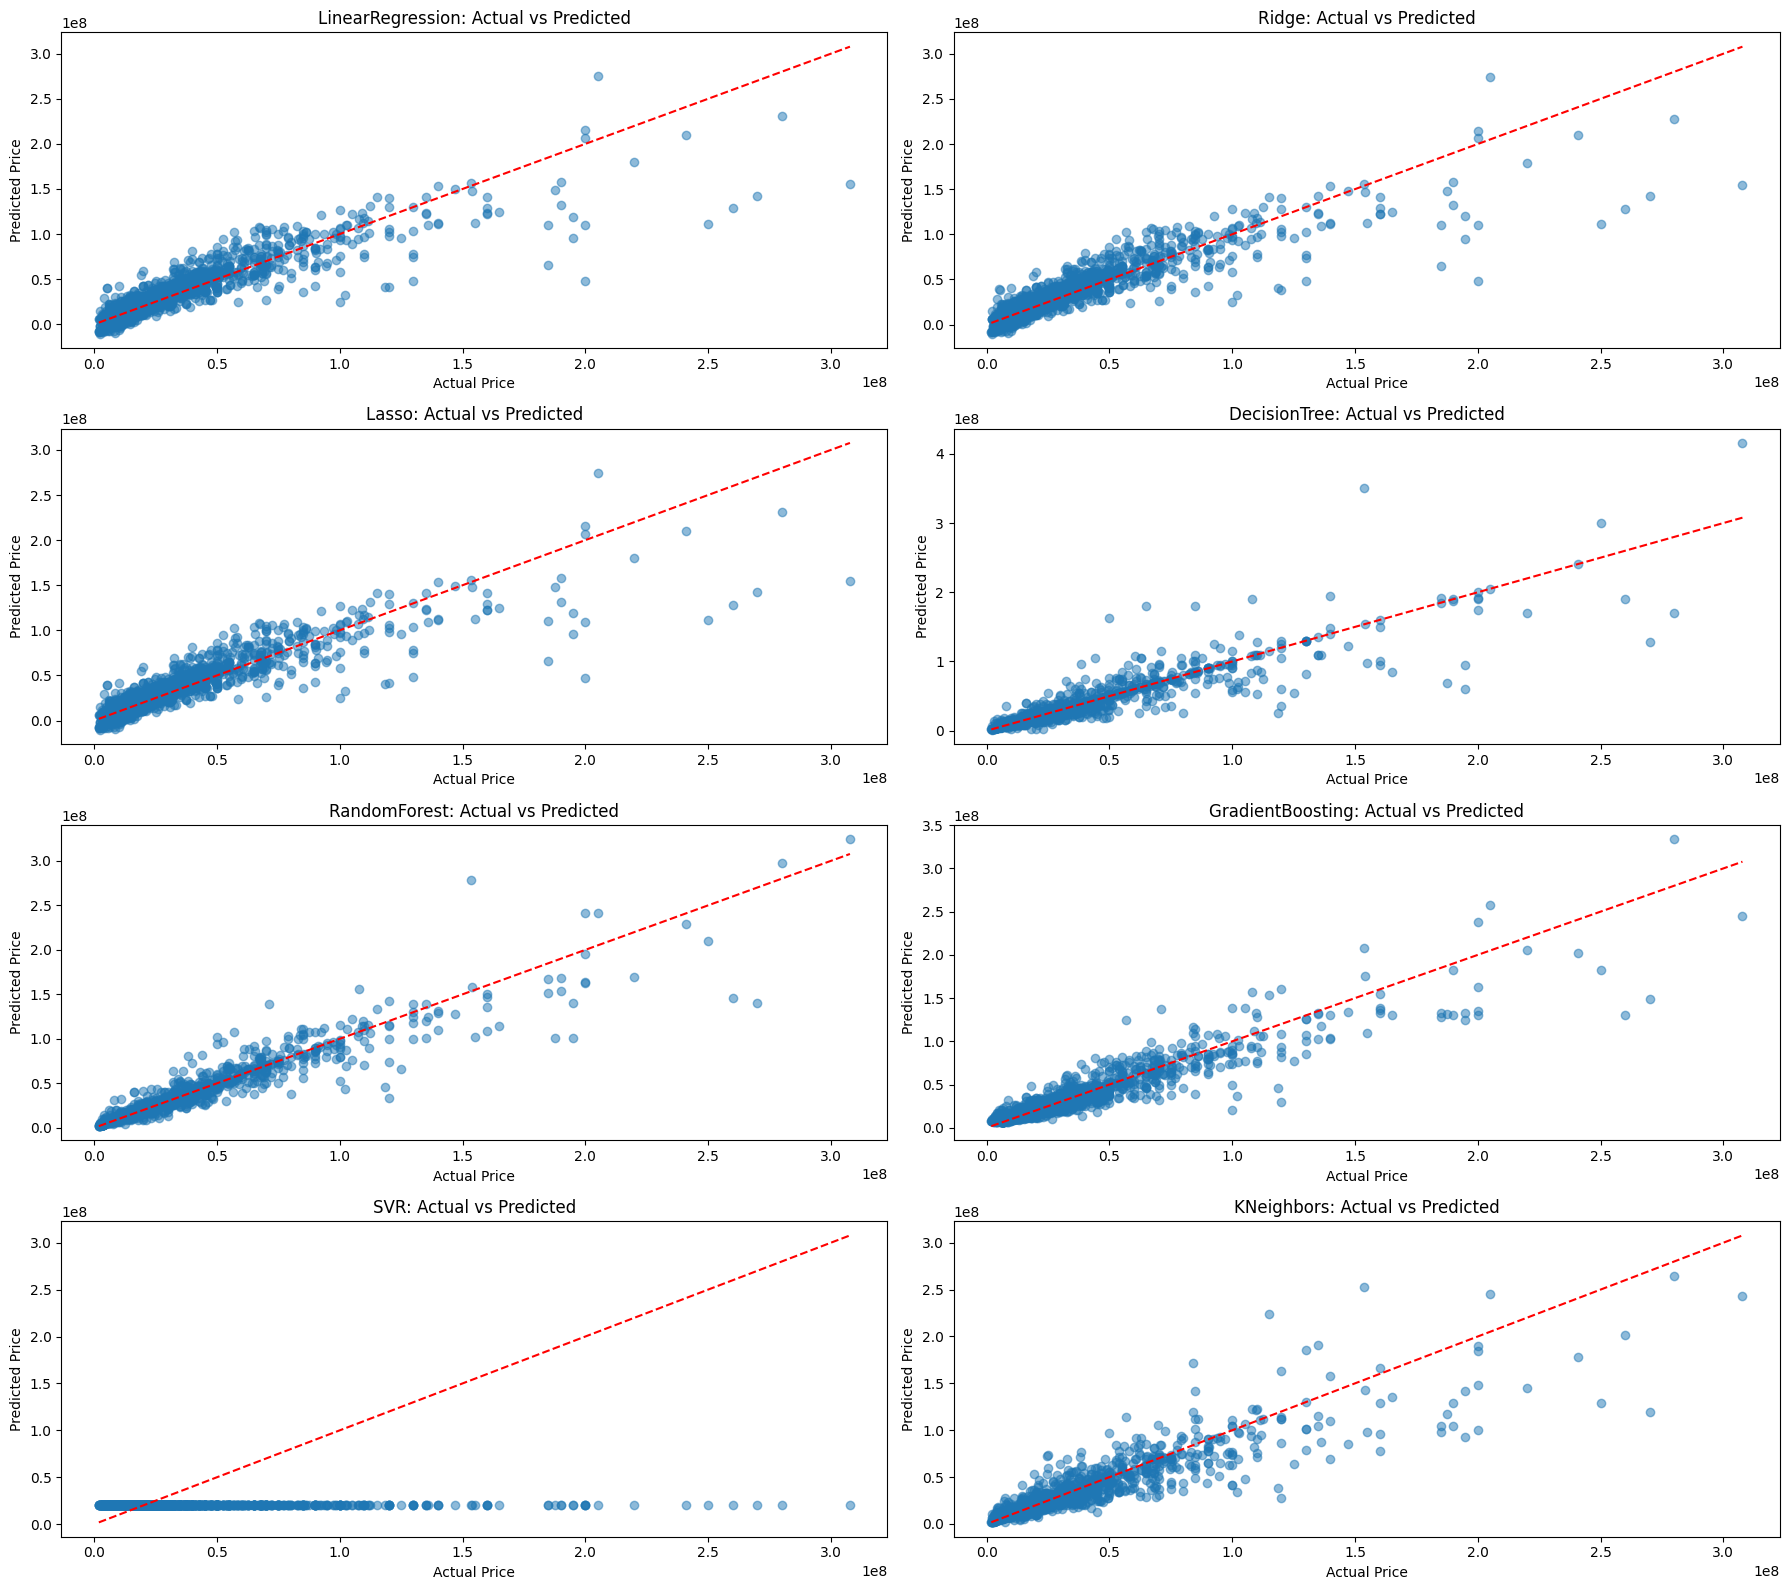

              Model          RMSE        R2
0  LinearRegression  1.406052e+07  0.803888
1             Ridge  1.403365e+07  0.804637
2             Lasso  1.405906e+07  0.803929
3      DecisionTree  1.336214e+07  0.822886
4      RandomForest  1.017464e+07  0.897308
5  GradientBoosting  1.163144e+07  0.865795
6               SVR  3.332618e+07 -0.101721
7        KNeighbors  1.378041e+07  0.811624


In [38]:
# Compare all suggested models, plot actual vs predicted, and show RMSE/R² table


model_dict = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}

results_list = []
plt.figure(figsize=(18, 16))
for i, (name, reg) in enumerate(model_dict.items()):
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results_list.append({'Model': name, 'RMSE': rmse, 'R2': r2})
    plt.subplot(4,2,i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{name}: Actual vs Predicted')
    plt.tight_layout()
plt.show()

# Results DataFrame
results_df = pd.DataFrame(results_list)
print(results_df)

## Final Model: Random Forest Regressor
Now we will use the Random Forest model for final training, evaluation, and visualization.

Random Forest RMSE: 9974751.40
Random Forest R²: 0.90


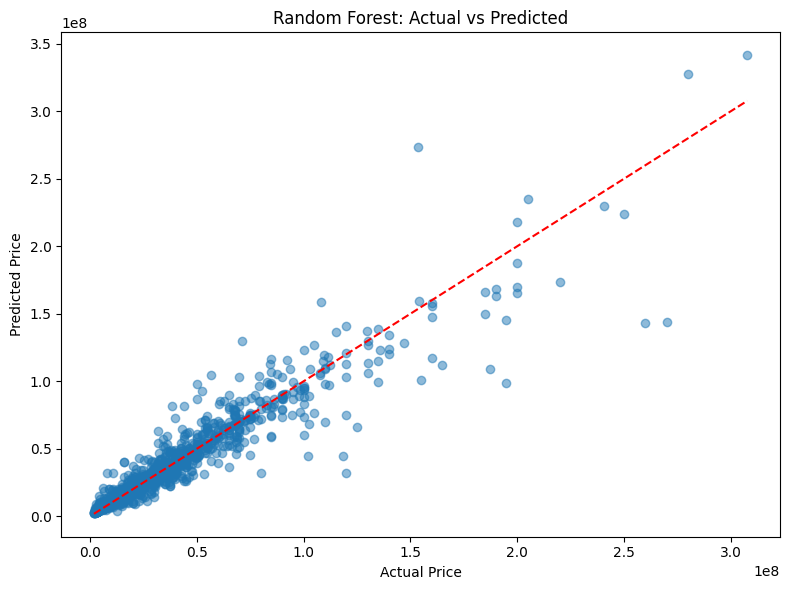

                             Feature    Importance
0                      surfaceLiving  6.555370e-01
1                             roomNb  1.251913e-01
2                             bathNb  4.506711e-02
3                            floorNb  3.293078e-02
4               locality_Bandra West  1.745929e-02
..                               ...           ...
118                 locality_Saphale  1.516856e-06
119               locality_Khar East  1.201646e-06
120          locality_Mira Road West  9.871000e-07
121            locality_Chedda Nagar  2.130697e-07
122  locality_Ramabai Ambedkar Nagar  1.504198e-07

[123 rows x 2 columns]


In [39]:
# Train, predict, evaluate Random Forest, and show feature importances
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import pandas as pd

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted')
plt.tight_layout()
plt.show()

# Feature importances
numeric_features = ['surfaceLiving', 'roomNb', 'bathNb', 'balconyNb', 'floorNb', 'parkingNb']
categorical_features = ['furnishedType', 'facing', 'locality']
ohe = rf_pipe.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

importances = rf_pipe.named_steps['regressor'].feature_importances_
feat_imp_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False).reset_index(drop=True)
print(feat_imp_df)

In [40]:
# Predict target value for user-input features using Random Forest model
# Example: Replace values below with your own input
input_data = {
    'surfaceLiving':950 ,
    'roomNb': 3,
    'bathNb': 3,
    'balconyNb': 3,
    'floorNb': 21,
    'parkingNb': 2,
    'furnishedType': 'Fully furnished',
    'facing': 'West',
    'locality': 'DahisarEast'
}

# Convert input to DataFrame
input_df = pd.DataFrame([input_data])

# Predict target value
predicted_price = rf_pipe.predict(input_df)[0]
print(f"Predicted Price: {predicted_price:.2f}")

Predicted Price: 27676166.67
